In [32]:
from keras.models import Sequential
from keras.layers import Dense
import numpy 
import pandas as pd 

In [33]:
seed = 7
numpy.random.seed(seed)

In [34]:
ngt=pd.read_csv("gas_turbines.csv")
ngt

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [35]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [36]:
df_norm = norm_func(ngt.iloc[:,:])
df_norm


,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,0.184182,0.456050,0.951314,0.255758,0.091426,0.584,0.984015,0.195191,0.135340,0.071522,0.596548
1,0.182020,0.466391,0.955881,0.255721,0.094755,0.585,0.984015,0.195459,0.133988,0.073372,0.597134
2,0.185295,0.474664,0.939003,0.252571,0.097367,0.586,0.980608,0.195325,0.134567,0.072576,0.593791
3,0.189922,0.482937,0.929126,0.252227,0.098033,0.588,0.983753,0.195459,0.135533,0.072375,0.595984
4,0.199830,0.493278,0.927708,0.255323,0.096650,0.589,0.983491,0.195459,0.136692,0.073647,0.592087
...,...,...,...,...,...,...,...,...,...,...,...
15034,0.247272,0.408480,0.975092,0.263380,0.065868,0.489,0.884696,0.153681,0.095739,0.102448,0.562214
15035,0.214075,0.414685,0.984153,0.256826,0.078672,0.455,0.806342,0.155965,0.102113,0.109894,0.566100
15036,0.195962,0.422958,0.989922,0.251593,0.084614,0.369,0.651730,0.134605,0.111772,0.180552,0.685449
15037,0.188443,0.433299,0.982936,0.246451,0.076777,0.424,0.754455,0.141994,0.121431,0.141693,0.710578


In [37]:
x=df_norm.iloc[:,[0,1,2,3,4,5,6,8,9,10]]
x

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,0.184182,0.456050,0.951314,0.255758,0.091426,0.584,0.984015,0.135340,0.071522,0.596548
1,0.182020,0.466391,0.955881,0.255721,0.094755,0.585,0.984015,0.133988,0.073372,0.597134
2,0.185295,0.474664,0.939003,0.252571,0.097367,0.586,0.980608,0.134567,0.072576,0.593791
3,0.189922,0.482937,0.929126,0.252227,0.098033,0.588,0.983753,0.135533,0.072375,0.595984
4,0.199830,0.493278,0.927708,0.255323,0.096650,0.589,0.983491,0.136692,0.073647,0.592087
...,...,...,...,...,...,...,...,...,...,...
15034,0.247272,0.408480,0.975092,0.263380,0.065868,0.489,0.884696,0.095739,0.102448,0.562214
15035,0.214075,0.414685,0.984153,0.256826,0.078672,0.455,0.806342,0.102113,0.109894,0.566100
15036,0.195962,0.422958,0.989922,0.251593,0.084614,0.369,0.651730,0.111772,0.180552,0.685449
15037,0.188443,0.433299,0.982936,0.246451,0.076777,0.424,0.754455,0.121431,0.141693,0.710578


In [38]:
y=df_norm["TEY"]
y

0        0.195191
1        0.195459
2        0.195325
3        0.195459
4        0.195459
           ...   
15034    0.153681
15035    0.155965
15036    0.134605
15037    0.141994
15038    0.153278
Name: TEY, Length: 15039, dtype: float64

In [39]:
model = Sequential()
model.add(Dense(40, input_dim=10, activation='relu'))
model.add(Dense(20,  activation='relu'))

model.add(Dense(1,  activation='relu')) 


In [40]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['mse']) 

In [59]:
history=model.fit(x, y, validation_split=0.33, epochs=150, batch_size=16,verbose=1) 


Epoch 1/150
630/630 [==============================] - 1s 2ms/step - loss: 0.5896 - mse: 6.2911e-05 - val_loss: 0.5897 - val_mse: 7.3873e-05
Epoch 2/150
630/630 [==============================] - 1s 2ms/step - loss: 0.5896 - mse: 6.2399e-05 - val_loss: 0.5898 - val_mse: 9.8033e-05
Epoch 3/150
630/630 [==============================] - 1s 2ms/step - loss: 0.5896 - mse: 6.7182e-05 - val_loss: 0.5897 - val_mse: 7.0839e-05
Epoch 4/150
630/630 [==============================] - 1s 2ms/step - loss: 0.5896 - mse: 6.2894e-05 - val_loss: 0.5897 - val_mse: 7.3791e-05
Epoch 5/150
630/630 [==============================] - 1s 2ms/step - loss: 0.5898 - mse: 1.2295e-04 - val_loss: 0.5897 - val_mse: 7.5926e-05
Epoch 6/150
630/630 [==============================] - 1s 2ms/step - loss: 0.5896 - mse: 6.2243e-05 - val_loss: 0.5898 - val_mse: 1.0436e-04
Epoch 7/150
630/630 [==============================] - 2s 2ms/step - loss: 0.5896 - mse: 6.0752e-05 - val_loss: 0.5897 - val_mse: 7.3720e-05
Epoch 8/150
6

In [60]:
scores = model.evaluate(x, y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100)) 

470/470 [==============================] - 1s 1ms/step - loss: 0.5896 - mse: 5.6824e-05
mse: 0.01%


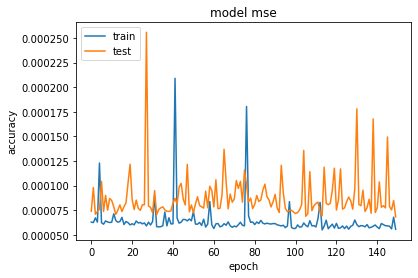

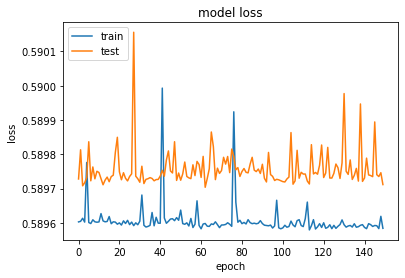

In [63]:
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('model mse')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss') 
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [12]:
#forest fires

In [13]:
nff=pd.read_csv("forestfires.csv")
nff

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [14]:
nff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [15]:
from sklearn import  preprocessing
label_encoder=preprocessing.LabelEncoder()
nff["month"]=label_encoder.fit_transform(nff["month"])
nff["day"]=label_encoder.fit_transform(nff["day"])
nff["size_category"]=label_encoder.fit_transform(nff["size_category"])
nff

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,0
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,0
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,0
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [16]:
a=nff.iloc[:,0:30]
a

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,0,1,0,0,0,0
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,0,1,0
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,0,1,0
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,0,1,0,0,0,0
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,0
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,0
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,0
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
b=nff.iloc[:,30]
b

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int32

In [18]:
model1 = Sequential()
model1.add(Dense(12, input_dim=30, activation='relu'))
model1.add(Dense(8,  activation='relu'))
model1.add(Dense(1,  activation='sigmoid')) 


In [19]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc']) 

In [52]:
history=model1.fit(a, b, validation_split=0.33, epochs=150, batch_size=20) 


Epoch 1/150
18/18 [==============================] - 0s 8ms/step - loss: 0.0199 - acc: 0.9971 - val_loss: 0.2872 - val_acc: 0.8947
Epoch 2/150
18/18 [==============================] - 0s 5ms/step - loss: 0.0210 - acc: 0.9971 - val_loss: 0.2937 - val_acc: 0.8947
Epoch 3/150
18/18 [==============================] - 0s 5ms/step - loss: 0.0182 - acc: 0.9942 - val_loss: 0.2624 - val_acc: 0.8947
Epoch 4/150
18/18 [==============================] - 0s 3ms/step - loss: 0.0182 - acc: 0.9971 - val_loss: 0.2595 - val_acc: 0.8947
Epoch 5/150
18/18 [==============================] - 0s 4ms/step - loss: 0.0169 - acc: 0.9971 - val_loss: 0.2952 - val_acc: 0.9006
Epoch 6/150
18/18 [==============================] - 0s 4ms/step - loss: 0.0179 - acc: 0.9971 - val_loss: 0.3423 - val_acc: 0.8947
Epoch 7/150
18/18 [==============================] - 0s 4ms/step - loss: 0.0205 - acc: 0.9942 - val_loss: 0.3314 - val_acc: 0.8889
Epoch 8/150
18/18 [==============================] - 0s 4ms/step - loss: 0.0204 - a

In [53]:
scores = model1.evaluate(a, b)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100)) 

17/17 [==============================] - 0s 2ms/step - loss: 0.1268 - acc: 0.9710
mse: 97.10%


In [54]:
history.history

{'loss': [0.019866103306412697,
  0.02098015323281288,
  0.018168499693274498,
  0.01816398836672306,
  0.016860876232385635,
  0.01788102462887764,
  0.020544961094856262,
  0.020371409133076668,
  0.017161155119538307,
  0.01814870350062847,
  0.01462041586637497,
  0.016827713698148727,
  0.014702830463647842,
  0.014523719437420368,
  0.01746503822505474,
  0.013802189379930496,
  0.013929430395364761,
  0.014687716029584408,
  0.016024956479668617,
  0.019131220877170563,
  0.01818683370947838,
  0.014520527794957161,
  0.029700562357902527,
  0.019913364201784134,
  0.01411378849297762,
  0.012342581525444984,
  0.024521540850400925,
  0.027895480394363403,
  0.03252318874001503,
  0.01256637368351221,
  0.013765444047749043,
  0.022213803604245186,
  0.017796959728002548,
  0.025331541895866394,
  0.03110435977578163,
  0.02792774885892868,
  0.02546151913702488,
  0.01660723239183426,
  0.01490631140768528,
  0.011862742714583874,
  0.016590887680649757,
  0.015120814554393291,

In [56]:
import matplotlib.pyplot as  plt

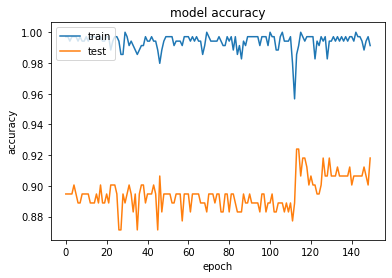

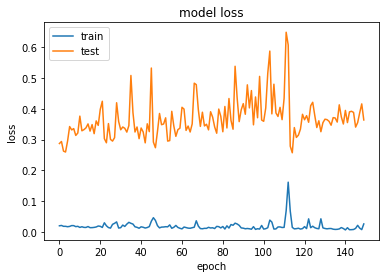

In [58]:

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss') 
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
